# Принятие решений в бизнесе на основе данных. Приоритезация гипотез. Анализ А/Б теста.

<div style="border:solid black 1px; padding: 20px">
    
***Задача:***
- Приоритезация гипотез увеличения выручки в интернет-магазине по фреймворкам ICE и RICE
- Анализ результатов А/Б теста

***Входные данные:***
- список гипотез
- информация о заказах пользователей
- информация о посещениях пользователей интернет-магазина</div>

### Предобработка данных

#### Загрузим необходимые для работы библиотеки и данные для анализа

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

#### Проведем проверку датасетов на наличие пропусков и соответствие типам данных

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


***Преобразуем тип данных столбца date в формат даты***

In [7]:
orders['date'] = pd.to_datetime(orders['date'])

***Проверим изменения***

In [8]:
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [9]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


***Преобразуем тип данных стобца date в формат даты***

In [11]:
visitors['date'] = pd.to_datetime(visitors['date'])

***Проверим изменения***

In [12]:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

***Проверим датафреймы на наличие дубликатов***

In [13]:
display(hypothesis.duplicated().sum())
display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

0

<div style="border:solid green 2px; padding: 20px">
Мы провели проверку датафреймов, преобразовали тип данных, пропусков и дубликатов не обнаружено, можно приступать к исследованию и анализу</div>

In [15]:
orders.groupby('visitorId').agg({'group':'nunique'})

,group
visitorId,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1
...,...
4266935830,2
4278982564,1
4279090005,1


In [16]:
users = orders.groupby('visitorId').nunique()
users_group = users['group']
total = 0
for i in users_group:
    if i > 1:
        total += 1

In [17]:
print('Кол-во пользователей, состоящих в двух группах: {}'.format(total))
print('Всего уникальных пользователей в тесте:', len(users))
print('Доля пользователей, состоящих в двух группах к общему кол-ву пользователей: {:.2f}'.format(58/1031*100))

Кол-во пользователей, состоящих в двух группах: 58
Всего уникальных пользователей в тесте: 1031
Доля пользователей, состоящих в двух группах к общему кол-ву пользователей: 5.63


***Посмотрим кол-во групп в orders и visitors***

In [18]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [19]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

*Две группы: А, Б*

***Проверим даты начала и окончания в датафреймах***

In [20]:
def dates(x):
    display(x.date.min())
    display(x.date.max())
display(dates(orders))
display(dates(visitors))

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

None

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

None

*Все окей*

***Посчитаем кол-во пользователей в каждой группе в таблице с заказами***

In [21]:
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


*Видна разница 83 пользователя, ранее было выявлено кол-во пользователей состоящих в друх группах одновременно - 58*

***Посмотрим на кол-во посещений для каждой группы***

In [22]:
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


*И здесь видна разница*

***Посмотрим на статистические показатели числовых данных***

In [23]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [24]:
visitors.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


*Минимальное и максимальное значения в orders['revenue'] выделяются, но в остальном все выглядит адекватно*

### Приоритезация гипотез

#### Отдел маркетинга подготовил 9 гипотез, которые оценены по 10-балльной шкале. Для приоритезации применим фреймворк ICE

<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [25]:
hypothesis['ice'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis[['Hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,Hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000


Топ-5 гипотез которым стоит уделить внимание:
- Запустить акцию дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для e-mail рассылок
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

#### Применим фреймворк RICE, добавив к расчету параметр Reach

In [26]:
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis[['Hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,Hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2


*Топ-5 не изменился, но изменилась последовательность, это связано с тем что во фреймворке RICE учитывается охват пользователей, которых коснется изменение*

#### Выведем результаты двух фреймворков

In [27]:
hypothesis[['Hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,Hypothesis,ice,rice
7,Добавить форму подписки на все основные страни...,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.200000,16.2


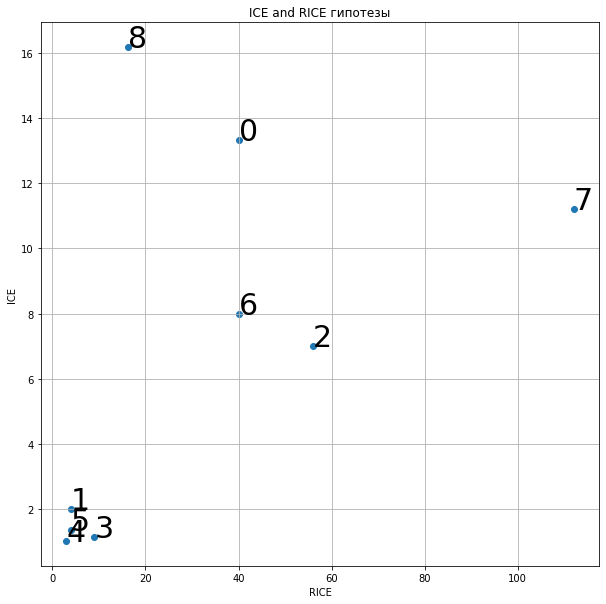

In [28]:
y = hypothesis['ice'] 
z = hypothesis['rice'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show() 

<div style="border:solid green 2px; padding: 20px">По полученным результатам можно сделать вывод, что наиболее приоритетны для нас будут гипотезы 7 и 2</div>

### Анализ А/Б теста

#### Для построения графиков коммулятивных данных, необходимо создать датафрейм, содержащий информацию о датах, группах(А/Б), кол-ве заказов, покупателей, посетителей и выручке

In [29]:
datesGroups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

In [30]:
#выводим кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            x['date'] >= orders['date'], x['group']==orders['group'])
    ].agg(
        {
            'date':'max', 
            'group':'max', 
            'transactionId':'nunique', 
            'visitorId':'nunique', 
            'revenue':'sum',
        }
    ), 
    axis = 1,
).sort_values(by=['date', 'group'])

In [31]:
#выводим кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            x['date'] >= visitors['date'], x['group']==visitors['group'])
    ].agg(
        {
            'date':'max', 
            'group':'max', 
            'visitors':'sum',
        }
    ), 
    axis = 1,
).sort_values(by=['date', 'group'])

In [32]:
#сводим все накопительные данные в одну таблицу
cummulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cummulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div style="border:solid green 2px; padding: 20px">Все готово для построения графиков, приступим к анализу результатов</div>

#### Построим график кумулятивной выручки по группам

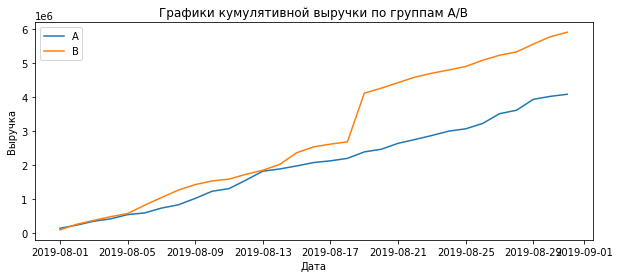

In [35]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.show();

*Кумулятивная выручка группы А растет плавно и она меньше, чем у группы Б. После 17го Августа наблюдается резкий скачок в группе Б, это может быть связано с увеличением кол-ва заказов или с поялвением "выбросов" в виде очень дорогих позиций.*

#### Построим график кумулятивного среднего чека по группам

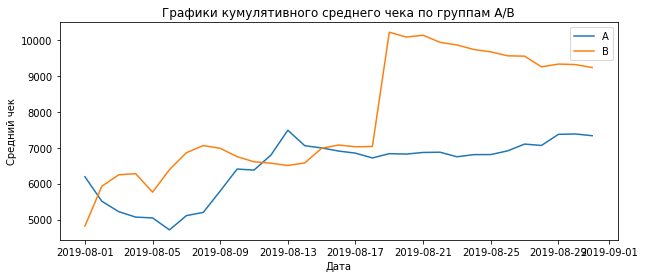

In [36]:
plt.figure(figsize=(10,4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')
plt.title('Графики кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

*Мы видим взлет показателей среднего чека группы Б, что говорит о появлении дорогих позиций. График среднего чека группы А стабилизировался через 2 недели после запуска теста*

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

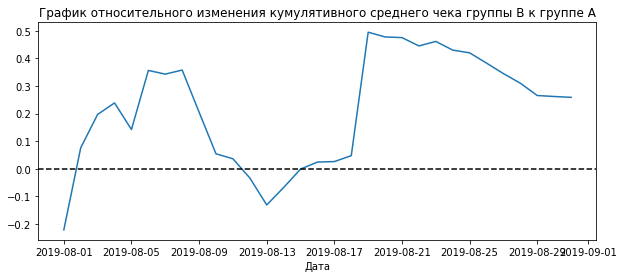

In [37]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/
                                       (mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1))
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

*Очевидны большие скачки, что подтверждает наличие выбросов и крупных позиций*

#### Построим график кумулятивной конверсии по группам

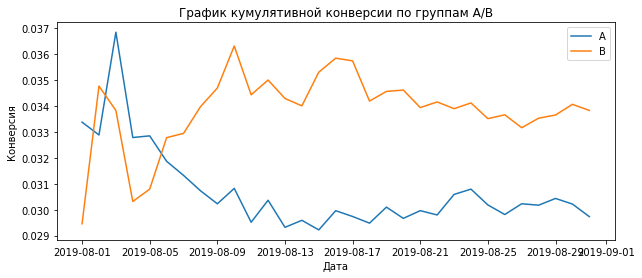

In [38]:
mergedCummulativeData['conversionA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 
mergedCummulativeData['conversionB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionA'], label='A')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionB'], label='B')
plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

*Конверсии стабилизировались через неделю после запуска теста, по графику видно, что результаты группы Б выглядят значительно лучше, чем у группы А*

#### Построим график изменения кумулятивной конверсии группы Б к группе А

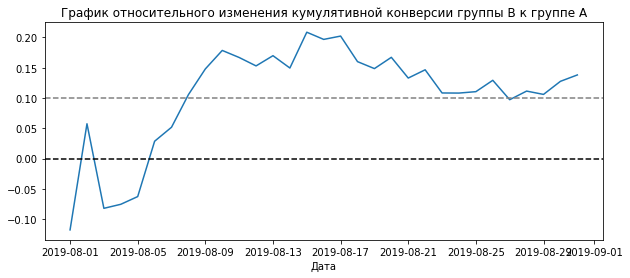

In [39]:
mergedCummulativeData.head(5)
plt.figure(figsize=(10,4))
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['conversionB']/mergedCummulativeData['conversionA'])-1))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

*Первую неделю теста группа Б проигрывала группе А, но со временем начала расти и вышла в лидеры. Далее мы видим небольшое снижение и возобновление роста к концу Августа - началу Сентября. Необходимо иметь в виду выбросы, о которых сигнализировали графики выше*

#### Построим точечный график количества заказов по пользователям

In [43]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns =  ['visitorId', 'orders']
display(ordersByUsers['orders'].describe())

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

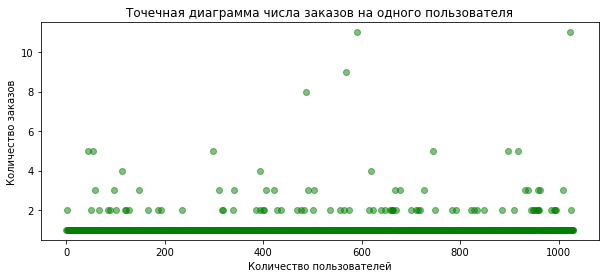

In [44]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, ordersByUsers['orders'], color='green', alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

*Исходя из полученных данных, можно сказать, что большинство пользователей не совершает более двух заказов*

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [51]:
orders_max = np.percentile(ordersByUsers['orders'], [95, 99])
display(orders_max)

array([2., 4.])

*Не более 5% пользователей совершили больше 2х заказов, и лишь 1% заказывали больше 4х раз*

#### Построим точечный график стоимостей заказов

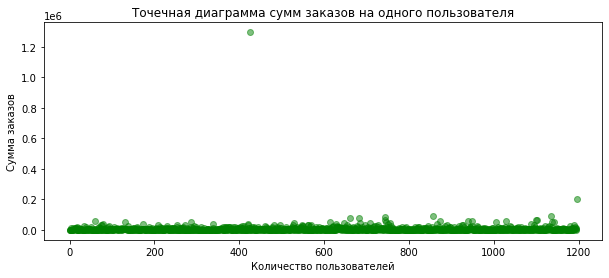

In [49]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма заказов')
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.show()

*На диаграмме виден заказ стоимостью больше 1.2млн, он мог вызвать скачки на графиках выше. Также можно заметить несколько дорогих заказов, отличающихся от большинства. Посмотрим на перцентили*

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [52]:
revenue_max = np.percentile(orders['revenue'], [95, 99])
display(revenue_max)

array([28000. , 58233.2])

*Как мы можем увидеть, большинство пользователей не совершает покупки дороже 30тыс руб, и 1% покупает на сумму около 60тыс и больше*

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным

Для этого подготовим данные и введем нулевую и альтернативную гипотезы:

- Нулевая гипотеза: различий в конверсии между группами нет.

- Альтернативная гипотеза: различия в конверсии между группами есть.

Уровень статистической значимости α = 0.05

In [53]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

In [54]:
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/
                                                                                          sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B разница статистически значима!')
else:
    print('По неочищенным данным различий в конверсии групп A и B нет!')


Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
По неочищенным данным в конверсии групп A и B разница статистически значима!


*По "сырым" данным видны различия - прирост конверсии группы Б к А больше 13%, p-value = 0.016 при значимости 5%, значит мы отвергаем гипотезу о том что статистически значимых различий между группами нет*

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

- Нулевая гипотеза: различий в среднем чеке между группами нет.

- Альтернативная гипотеза: различия в среднем чеке между группами есть.

Уровень статистической значимости α = 0.05

In [67]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным разница в средних чеках в группах A и B статистически значима!')
else:
    print('По неочищенным данным разница в средних чеках в группах A и B статистически не значима!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.7292909855432458
По неочищенным данным разница в средних чеках в группах A и B статистически не значима!


*По "сырым" данным различий нет, p-value = 0.72 при значимости 5%, нулевую гипотезу не отвергаем. Разница в 26% не является статистически значимой*

#### Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным, за потолок возьмем значения полученные из исследований выше - большинство пользователей не совершает больше 2 заказов, и не заказыват на сумму больше 28тыс руб

- Нулевая гипотеза: различий в конверсии между группами нет.

- Альтернативная гипотеза: различия в конверсии между группами есть.

Уровень статистической значимости α = 0.05

In [68]:
limit_orders = orders_max[0]
limit_revenue = revenue_max[0]

***Соберем аномальных пользователей в abnormalUsers***

In [69]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


In [70]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B разница статистически значима!')
else:
    print('По очищенным данным различий в конверсии групп A и B нет!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.013042592743036745
По очищенным данным в конверсии групп A и B разница статистически значима!


*По "очищенным" данным разница значима. Прирост конверсии группы Б к А увеличился до 17%, p-value = 0.013 при значимости 5%*

 #### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

- Нулевая гипотеза: различий в среднем чеке между группами нет.

- Альтернативная гипотеза: различия в среднем чеке между группами есть.

Уровень статистической значимости α = 0.05

In [66]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным разница в средних чеках в группах A и B статистически значима!')
else:
    print('По очищенным данным различий в средних чеках в группах A и B нет!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.738481751314565
По очищенным данным различий в средних чеках в группах A и B нет!


*По разнице чеков различия практически нет: -0.02, p-value 0.73 при значимости 5%*

### Вывод

<div style="border:solid green 2px; padding: 20px">

    
Мы провели исследование данных пользователей интернет-магазина. По результату анализа можно выделить следующие моменты:
    
***Приоритезация гипотез***

После оценки списка гипотез фреймворками, предоставленных отделом маркетинга, можно рекомендовать обратить первоочередное внимание на гипотезы:
    - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
    - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
    
***Анализ результатов А/Б теста***
    
- Графики куммулятивных данных(выручка, средний чек, конверсия) указывают на "победу" группы Б
- В конверсии есть статистически значимые различия между группами, как по сырым так и по очищенным данным. Конверсия группы Б выше на 13-17%
- По среднему чеку статистически значимых различий нет, ни в сырых, ни в очищенных данных. Разница средних чеков групп А и Б составляет менее 2%.

***Исходя из результатов, полученных в ходе проведения анализа, можно рекомендовать остановить тест и зафиксировать победу группы Б.***
    
</div>